# Sequential DNA analysis

The problem of dna subsequence matching is a very difficult problem in computer science, belonging to a category of problems known as Nondeterministic Polynomial, or NP. These problems are often of exponential time complexity, and therefore can take enormous amounts of time to analyse completely.

Therefore, some techniques can be applied to reach suboptimal results in a more attainable timeframe. As such, some of these techniques are known as Heuristics. These allow for an algorithm to exploit known characteristics of the problem, in order to search through the space of possibilities in a more intelligent fashion.

In this sense, there are some heuristics and techniques that differ in their approach, into what can be described as two categories; Exploration, wherein the algorithm seeks to try newer solutions whenever possible, so as to explore the space of possibilities in a broader sense; and Exploitation, which revolves around making use of known characteristics of the problem in order to improve upon any given solution, often iteratively, so as to try and reach a good answer. Some of the algorithms below lean more on one or another, as will be discussed ahead.  

In this report, I delve into four different approaches to solve this problem. As they stand:
- Smith Waterman Heuristic:

    The Smith Waterman heuristic makes use of a Matrix to analyze every combination more efficiently, and then allows for back-tracking through said matrix for reconstructing the substring which produced the highest score. This algorithm makes use of mostly exploitation, and very little exploration.

- Local Search

    The Local Search algorithm will take a random substring of one of the sequences, and then try to match it to a series of random subsequences in the other sequence, so as to try varying combinations, and hopefully achieve a close solution to the real best fit. This algorithm makes use of mostly exlporation, and very little exploitation.

- Exaustive Search

    Exaustive Search consists on a naive implementation of the basic concept of "Search every combination to make sure you know the best one". It is pure exploration, as it needs no information about the structure of the problem to create the space of possibilities.

- Bounded Exaustive Search

    Bounded Exaustive Search is a more balanced approach, which searches through possibilities in a certain order, so as to maximize the chances of getting the best score possible, as quickly as possible, and once no improvement is available from that point, computations are terminated.

In [1]:
import os
import pandas as pd
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import random
from analyser import Test

with open('/home/user/Supercomp/DNAProject/cache.pickle', 'rb') as f:
    time_dict = pickle.load(f)

# Testing

Tests were generated at runtime, then directed to Stdin for each executable using the script [analyser.py](analyser.py), which after all executions were terminated, dumped a dictionary of times and input sizes to a .pickle file for access here. It is important to note, that to remove time variance for the algorithms, each execution repeated three times, and an average was then collected.

# Analysis

Below, 4 3D graphs are created to analyse the time progression of all 4 algorithms. These all have the sizes of the sequences on the x and y axes, and the z axis represents the time in milliseconds.

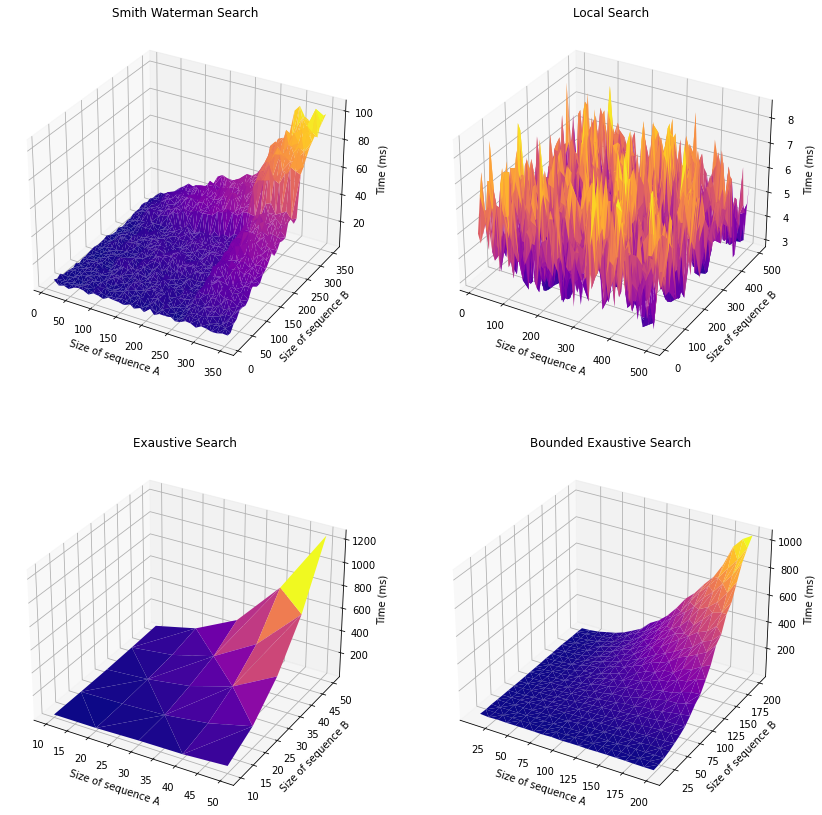

In [2]:
# Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/ExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
fig = plt.figure(figsize=(14,29))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Exaustive Search')


# Local Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/LocalSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax2.set_xlabel('Size of sequence A')
ax2.set_ylabel('Size of sequence B')
ax2.set_zlabel('Time (ms)')
ax2.set_title('Local Search')


# SmithWaterman Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/SmithWaterman/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax3 = fig.add_subplot(221, projection='3d')
ax3.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax3.set_xlabel('Size of sequence A')
ax3.set_ylabel('Size of sequence B')
ax3.set_zlabel('Time (ms)')
ax3.set_title('Smith Waterman Search')


# Bounded Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/BoundedExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax4 = fig.add_subplot(122, projection='3d')
ax4.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax4.set_xlabel('Size of sequence A')
ax4.set_ylabel('Size of sequence B')
ax4.set_zlabel('Time (ms)')
ax4.set_title('Bounded Exaustive Search')


fig.show()

 As may be seen on the above graphs, local search took a constant time, which might seem as a complexity of O(1), however it is worth noting that this does not guarantee optimal output, and only checks a select portion of the sequence, yielding often quite poor results.

 Smith Waterman is also similar in that it is very fast, altough not optimal, however there does seem to be some increase in time based on input size (albeit non-linear). It is interesting to note, that for inputs of size less than 250x250, it seems to be rather constant, and this might be due to the OS switching thread execution to other tasks after a certain amount of time has passed for the larger inputs (purely speculative).  

 The naive Exaustive search is rather slow, clocking in at around 50 seconds for some of the larger inputs (not shown in graph), but seems to perform reasonably well for smaller sizes. It does however guarantee the optimal solution.

 The alternative Bounded Exaustive Search did seem to produce the same results as the naive Exaustive search in my tests, but I'm not confident it is also optimal. Whatever the case may be, it is around 100x faster than its naive counterpart, and still produces great results.

# In-depth analysis of algorithms

## SmithWaterman

The Smith Waterman heuristic seems to present a good balance between speed and accuracy. It is, however, not possible to analyze the score proximity to the other algorithms, beacause of a critical difference in strategy. Smith Waterman considers possible gaps in sequences, such that sequences like 'CTG' and 'CAG' get matched not only as themselves, but also 'C-G' to 'C-G' and '-TG' to C-G'. When comparing large sequences, this can produce large differences and create high-scoring long sequences, that don't match other searches that were implemented.

The main point of contention with Smith Waterman is its space complexity (creating a $n \times m$ matrix is quite space-intensive), as is the case with most dynamic programming solutions.

## Local Search

As presented, the Local Search algorithm produced very fast times across the board, which would be very impressive, if it had achieved anywhere near the correct solution. As implemented, it simply can't try that many possibilities, and as such is not likely to reach a good result.

It does not take any additional space given a larger input, and does not seem to increase in time given the change in input size, so it does not seem to need any improvements in terms of speed or space complexity.

## Exaustive Search

The implementation of this algorithm is very straightforward. First we iterate over each string, acumulating all possible substrings in a set (set is used to avoid repetition, especially on smaller sizes). Then, loop through the first set, checking every possibility in the other set, and keeping track of the best score. If the selected substrings are of different size, check every possible combination of matching size.

This is obviously very repetitive and slow, which is why this takes 50sec on an input of size 100x100. It does also have O(n) space complexity to store the additional sets of substrings, which does not help its case. In general this a poor implementation of a slow algorithm.

## Bounded Exaustive Search

The implementation of this algorithm starts from a size of $n=min(size(a), size(b))$ and then progressively reduces n as it searches every substring of size n on the larger sequence. As soon as it finds a new high score that is also a full match ($Score = 2 \cdot n$, assuming a value for matches of 2), it stops its execution. This is because any string smaller than n, can never score more than $2n$.

This algorithm has a time complexity of O($n^3$), the most executed code is to score a pair of sequences.

# Parallel computing

## Multi-Core LocalSearch

The next implementation was of a LocalSearch, in a multi-core environment (4-core CPU). In order to adapt all the code, many changes to implementation details had to be accounted for, and so as to keep the comparison more fair, the actual algorithm implementation was made in a separate .hpp header file, and merely imported and run a few dozen times (each time producing a different result, since this depended on a pseudo-random algorithm). This means that both sequential and parallel programs execute identical code, and only differ in terms of threading(the parallel implementation launches and executes multiple threads simultaneously, whereas in the sequential, experiments attempted one by one, by a single thread).

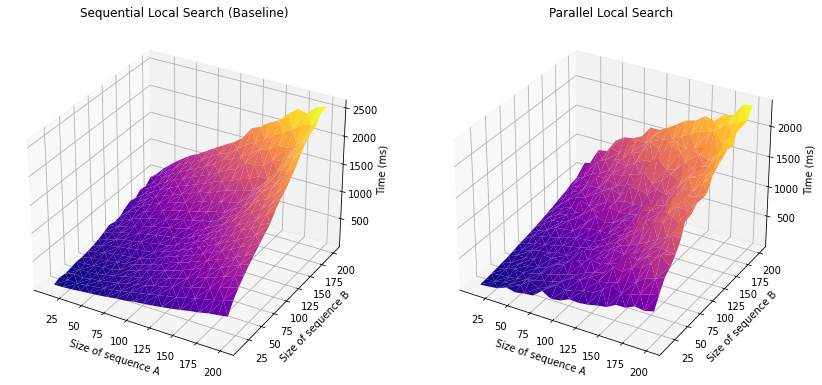

In [3]:
# Sequential Search
experiment_list = list(map(lambda x: x.__dict__ ,time_dict['Parallel/LocalSearch/main_seq']))
experiment_list
congregated = {}
for k in list(experiment_list[0]):
    congregated[k] = []
for d in experiment_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
fig = plt.figure(figsize=(14,29))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Sequential Local Search (Baseline)')

# Parallel Local Search
experiment_list = list(map(lambda x: x.__dict__ ,time_dict['Parallel/LocalSearch/main_par']))
experiment_list
congregated = {}
for k in list(experiment_list[0]):
    congregated[k] = []
for d in experiment_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax = fig.add_subplot(122, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Parallel Local Search');

As can be seen in the graphs, the CPU multithreaded approach is only marginally faster, possibly due to the overhead in creating and launching new stacks, as well as all the stack manipulation in the calling of subroutines inside each thread. Also, 4 threads is not that big of a number, and with a more powerful multithreaded system, this coul be faster.

## Many-Core Exaustive Search (GPU)

In the GPU, many calculations can be performed simultaneously, which can lead to massive performance gains for large input sizes. Unfortunately, at the scale these tests would show a significant difference, the available time-frame for this project would become rather unachievable, and so below we compare the naive exaustive search from above with two different implementations of GPU parallelization (detailed after the graphs).

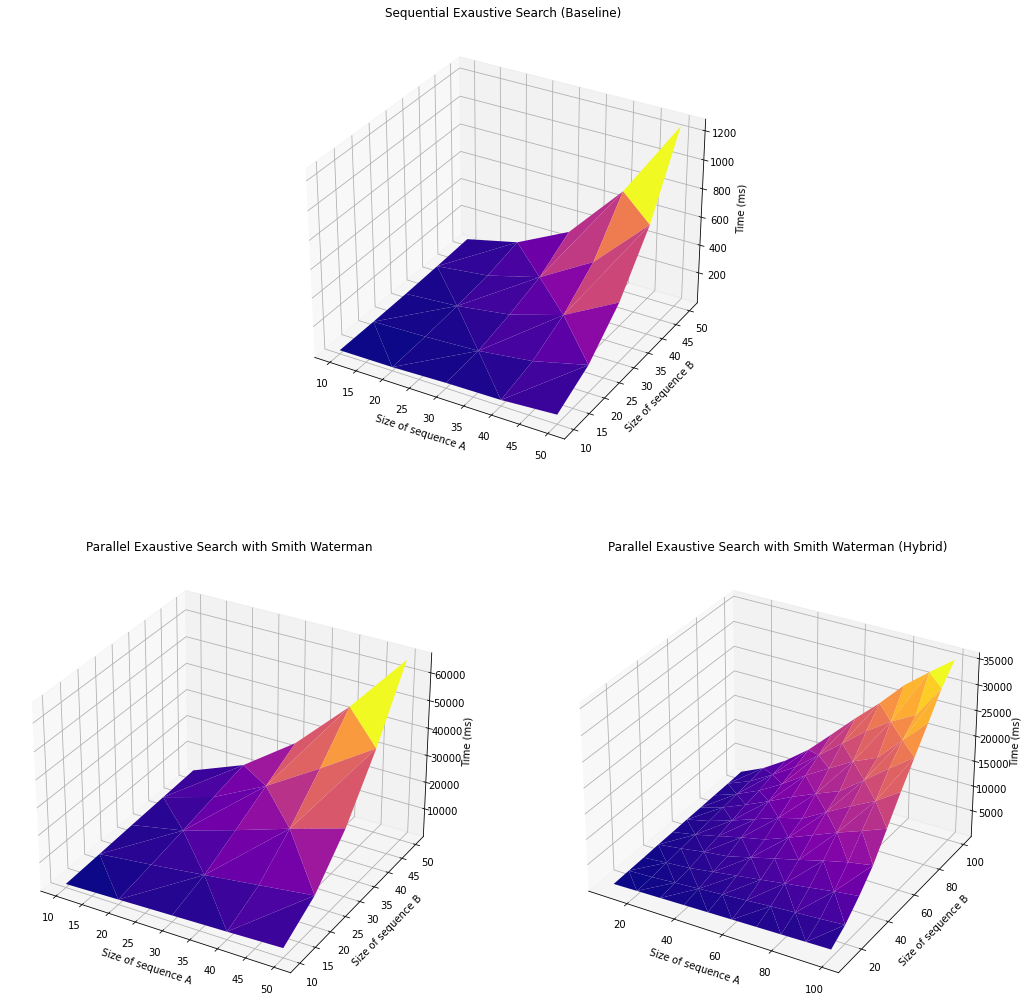

In [4]:
# Sequential Search
experiment_list = list(map(lambda x: x.__dict__ ,time_dict['Sequential/ExaustiveSearch/main']))
experiment_list
congregated = {}
for k in list(experiment_list[0]):
    congregated[k] = []
for d in experiment_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(211, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Sequential Exaustive Search (Baseline)')

# Parallel Search
experiment_list = list(map(lambda x: x.__dict__ ,time_dict['Parallel/GPU/main']))
experiment_list
congregated = {}
for k in list(experiment_list[0]):
    congregated[k] = []
for d in experiment_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax = fig.add_subplot(223, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Parallel Exaustive Search with Smith Waterman');

# Parallel Search
experiment_list = list(map(lambda x: x.__dict__ ,time_dict['Parallel/Hybrid/main']))
experiment_list
congregated = {}
for k in list(experiment_list[0]):
    congregated[k] = []
for d in experiment_list:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax = fig.add_subplot(224, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Parallel Exaustive Search with Smith Waterman (Hybrid)');

As can be seen above, both parallel GPU implementations were quite slow. In fact, compared to the sequential implementation for these input sizes, it can be hundreds of times slower. Before we can analyse the reasons behind that fact, we should first elaborate on the implementation details of each new algorithm above.

On the left, labeled as "Parallel Exaustive Search with Smith Waterman", the scoring of each pair of subsequences is done with Smith Waterman, and the parallel part is implemented exclusively on the Smith Waterman scoring. In particular, this parallelism was encapsulated in a function, which sends all the data to the GPU, every time, and returns an individual score.

On the right, labeled as "Parallel Exaustive Search with Smith Waterman (Hybrid)", the previous algorithm was further optimized, initially by only creating the data for the sequences and actual value vectors once, and then only manipulating the pointers in order to test combinations (this reduces the amount of data on the data bus dramatically, which produces a very large increase in performance), and after that was implemented, OpenMP CPU parallelization of transform calls was used in order to fill the GPU processing queue, which is meant to reduce GPU down time as much as possible (for instance, while waiting for the next task, the GPU would be idle in the previous program, but now it always has several tasks lined up).

As mentioned, the main bottleneck for this process is the transfer of data to the GPU, which is very large in the first implementation. However, with some clever tricks and iterator pointer manipulations, the same algorithm can be sped up significantly, as seen above. The Hybrid pointers algorithm achieved about half the time, at an input twice as large (in both dimensions), which would be a speedup of about 8x over the slow naive implementation.

During this project, there was an attempt to run the naive algorithm using inputs larger than 50x50. Specifically, it was set up to run up to 200x200. Unfortunately, after being left running with nohup (Ubuntu program to prevent hangup shutdown) over 40 hours, it still did not complete its execution, and as such, the data was left at 50x50.

## Conclusions and considerations

The DNA sequence matching problem is far from simple, and can be extremely challenging at times. Many different heuristics and algorithms not shown here exist, such as a Genetic Algorithm or some machine learning solutions. For small subsequences the bounded exaustive search implemented above produced very good results in very little time, however, it scaled quite poorly for inputs that are very large. Smith Waterman implementations are very fast and produce very good results, but cannot guarantee optimal solutions, and use up large amounts of memory. And finally, Local Search implementations can be rather fast, however they often produce not great results, due to relying mostly on exploration.

For larger sizes of input, the parallel implementations may be noticeably faster than the sequential alternatives, however they both take amounts of time well outside the scope of this project, and as such were not directly validated.

Finally, all implementations are available in the GitHub repository, under a directory structure, with clear makefiles and simple usability for anyone interested in running these examples for themselves.